<a href="https://colab.research.google.com/github/SuperDuck1892/A.I_HomeWork/blob/main/Face_my_Friend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU
from keras.optimizers import Adam

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [ ]:
train="/content/drive/MyDrive/FaceMyFriend"
Data1 = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
data_train = Data1.flow_from_directory(train, target_size=(150,150),batch_size=32, class_mode='categorical')
data_train.class_indices

Found 342 images belonging to 10 classes.


{'Chinh': 0,
 'Lam': 1,
 'Nha': 2,
 'Nhan': 3,
 'Phat': 4,
 'Phong': 5,
 'Quan': 6,
 'Quy': 7,
 'Viet': 8,
 'Vu': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 18, 18, 128)     

In [ ]:
from keras.losses import categorical_crossentropy
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train=model.fit(data_train,batch_size=128,epochs=30,verbose=1)
test=model.evaluate(data_train,verbose=0)
print('Do mat mat:',test[0])
print('Do chinh xac:',test[1])


Epoch 1/30
11/11 [==============================] - 120s 10s/step - loss: 10.3426 - accuracy: 0.2573
Epoch 2/30
11/11 [==============================] - 78s 7s/step - loss: 0.7871 - accuracy: 0.7749
Epoch 3/30
11/11 [==============================] - 78s 7s/step - loss: 0.1975 - accuracy: 0.9415
Epoch 4/30
11/11 [==============================] - 79s 7s/step - loss: 0.0942 - accuracy: 0.9708
Epoch 5/30
11/11 [==============================] - 83s 7s/step - loss: 0.0704 - accuracy: 0.9766
Epoch 6/30
11/11 [==============================] - 80s 7s/step - loss: 0.0768 - accuracy: 0.9737
Epoch 7/30
11/11 [==============================] - 79s 7s/step - loss: 0.0548 - accuracy: 0.9825
Epoch 8/30
11/11 [==============================] - 79s 7s/step - loss: 0.0160 - accuracy: 0.9971
Epoch 9/30
11/11 [==============================] - 78s 7s/step - loss: 0.0162 - accuracy: 0.9942
Epoch 10/30
11/11 [==============================] - 80s 7s/step - loss: 0.0262 - accuracy: 0.9942
Epoch 11/30
11/1

In [ ]:
model.save('/content/drive/MyDrive/SaveFace')

<ipython-input-41-d65c35ba4084>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='orange')


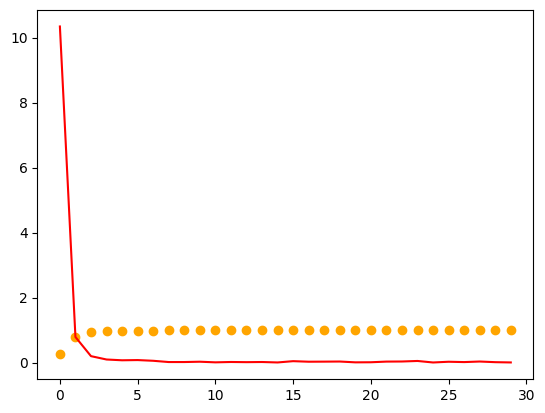

In [ ]:
accuracy =train.history['accuracy']
loss = train.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='orange')
plt.plot(epochs,loss , 'r', label ='Training loss')
plt.show()

In [ ]:
from keras.models import load_model
# load model save
model_face = load_model('/content/drive/MyDrive/SaveFace')

1/1 [==============================] - 0s 121ms/step
NGUOI NAY LA : Lam


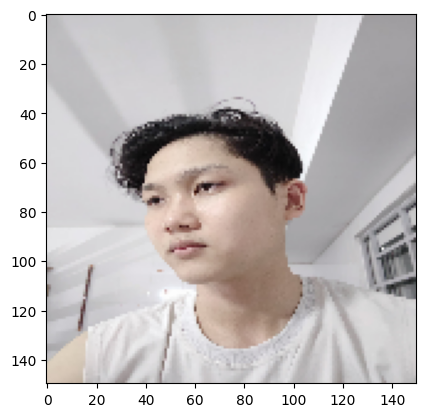

1/1 [==============================] - 0s 49ms/step
NGUOI NAY LA : Phong


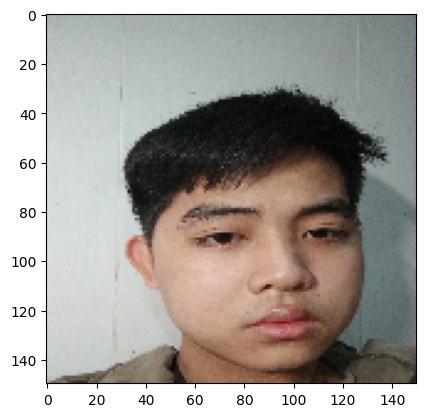

1/1 [==============================] - 0s 48ms/step
NGUOI NAY LA : Nha


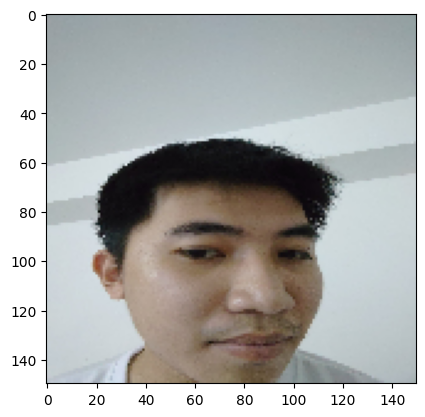

1/1 [==============================] - 0s 45ms/step
NGUOI NAY LA : Phat


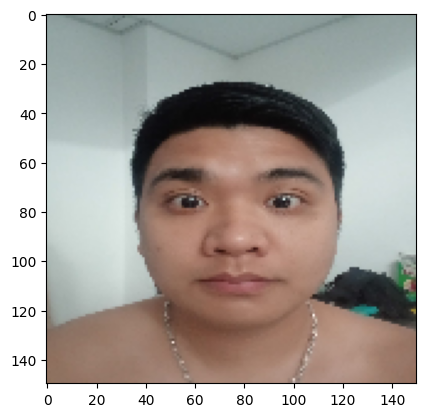

1/1 [==============================] - 0s 83ms/step
NGUOI NAY LA : Nhan


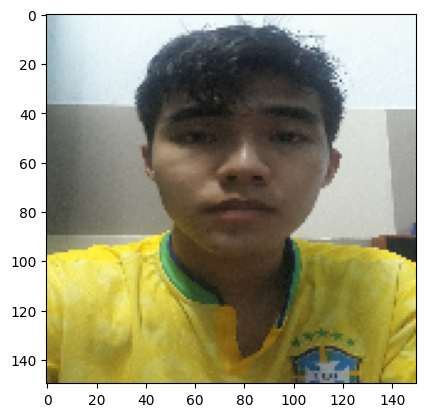

1/1 [==============================] - 0s 46ms/step
NGUOI NAY LA : Vu


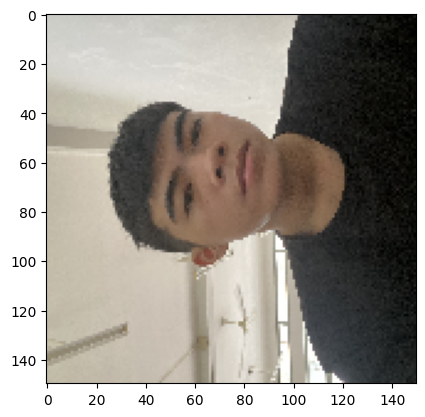

1/1 [==============================] - 0s 46ms/step
NGUOI NAY LA : Viet


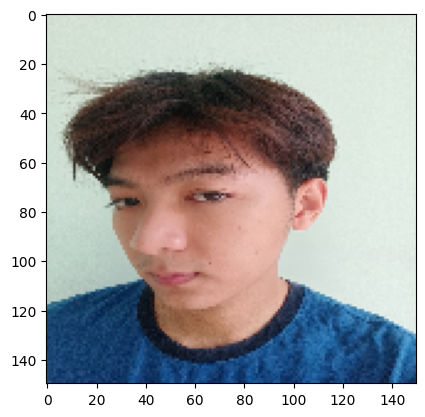

1/1 [==============================] - 0s 71ms/step
NGUOI NAY LA : Quy


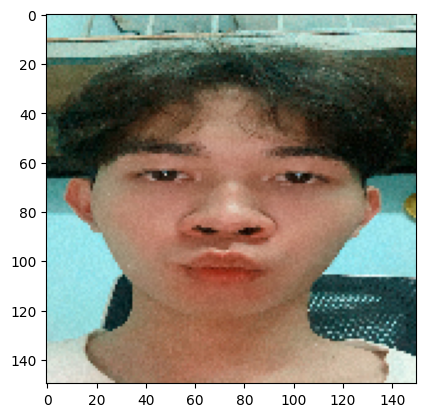

1/1 [==============================] - 0s 75ms/step
NGUOI NAY LA : Quan


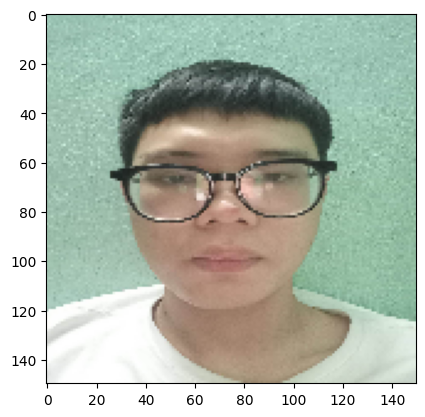

1/1 [==============================] - 0s 115ms/step
NGUOI NAY LA : Chinh


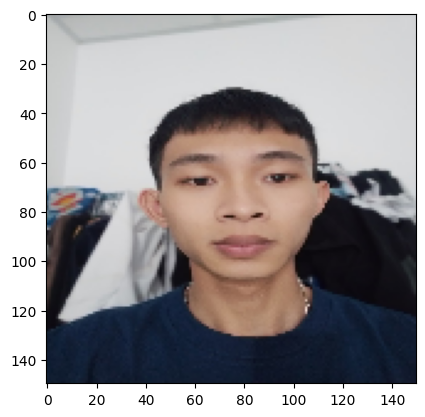

In [ ]:
from keras.utils import np_utils, to_categorical, load_img, img_to_array
folder='/content/drive/MyDrive/Test_Face/'
for i in os.listdir(folder):
  img = load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_face.predict(img).argmax())
  class_name=['Chinh', 'Lam', 'Nha', 'Nhan', 'Phat','Phong','Quan','Quy','Viet','Vu']
  print('NGUOI NAY LA : {}'.format(class_name[result]))
  plt.show()